In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import xgboost as xgb



In [3]:
df=pd.read_csv('malicious_phish.csv')

In [5]:
df.head(15)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [4]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [5]:
df.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [33]:
df.isna().sum()

url                 0
type                0
count_dot           0
number_of_hyphen    0
number_of_qm        0
dtype: int64

In [6]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

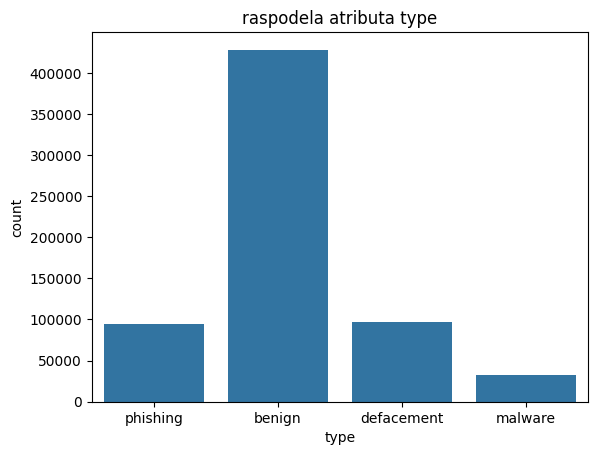

In [7]:
sns.countplot(x='type',data=df)
plt.xlabel('type')
plt.ylabel('count')
plt.title('raspodela atributa type')
plt.show()

<h3>feature engineering</h3>

In [8]:
df_benign=df[df.type=='benign']
df_phishing=df[df.type=='phishing']
df_defacement=df[df.type=='defacement']
df_malware=df[df.type=='malware']

In [ ]:
pd.set_option('display.max_colwidth', None)

In [110]:
df_benign.head()

,url,type
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
5,http://buzzfil.net/m/show-art/ils-etaient-loin-de-s-imaginer-que-le-hibou-allait-faire-ceci-quand-ils-filmaient-2.html,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign


In [9]:
df_phishing.head(10)

,url,type
0,br-icloud.com.br,phishing
21,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing
28,http://www.marketingbyinternet.com/mo/e56508df...,phishing
40,https://docs.google.com/spreadsheet/viewform?f...,phishing
72,retajconsultancy.com,phishing
87,http://www.martin-busker.de/administrator/help...,phishing
94,alexpay2.beget.tech,phishing
105,facebook.unitedcolleges.net,phishing
106,http://www.bimabn.com/1-configurazione-support...,phishing
126,halkbankparaf-para.com,phishing


In [10]:
from wordcloud import WordCloud

In [11]:
phish_url = " ".join(i for i in df_phishing.url)

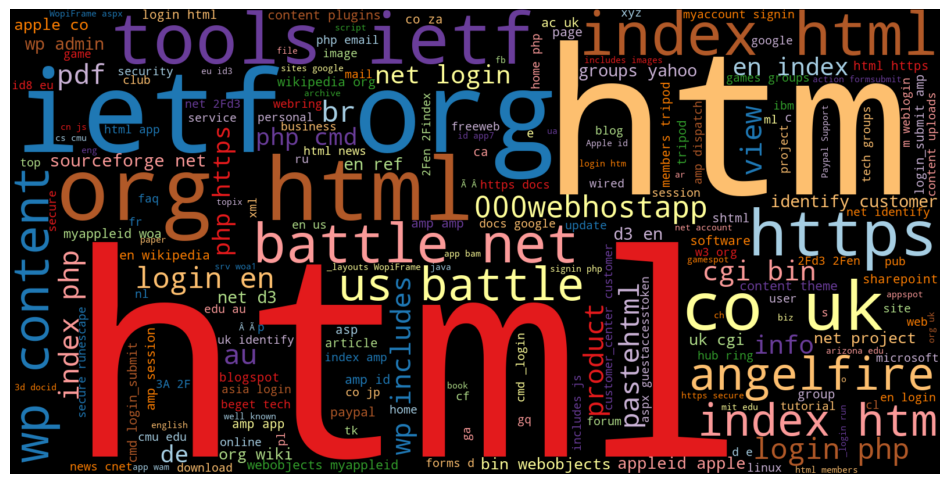

In [12]:
wc= WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure(figsize=(12,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

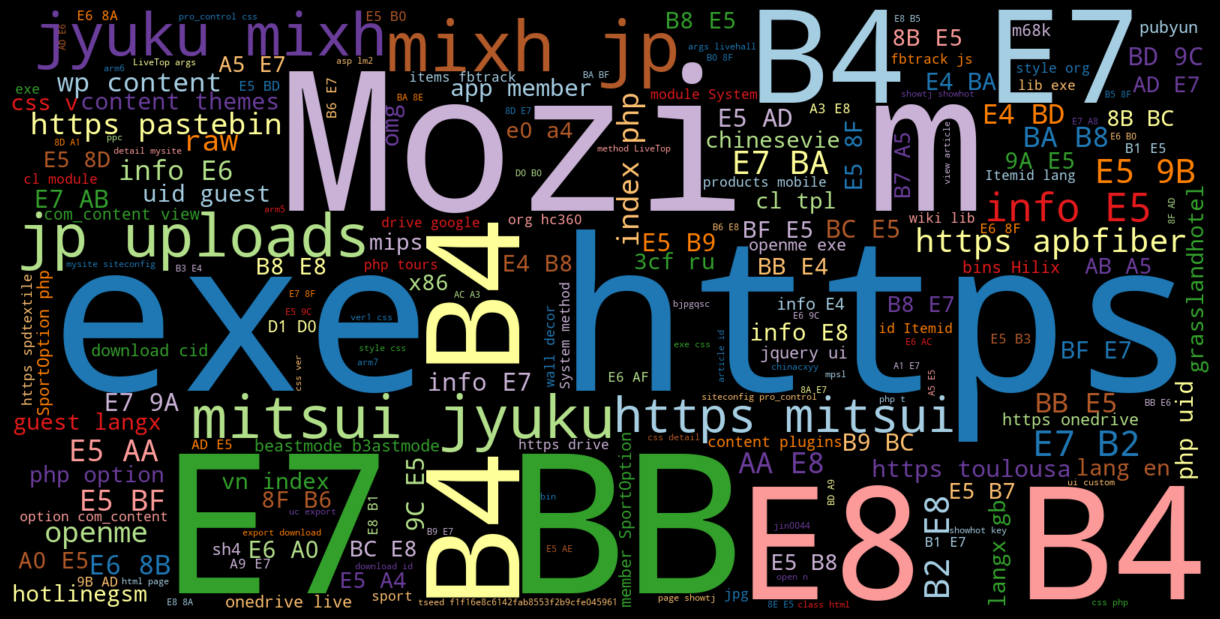

In [13]:
malware_url = " ".join(i for i in df_malware.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(malware_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

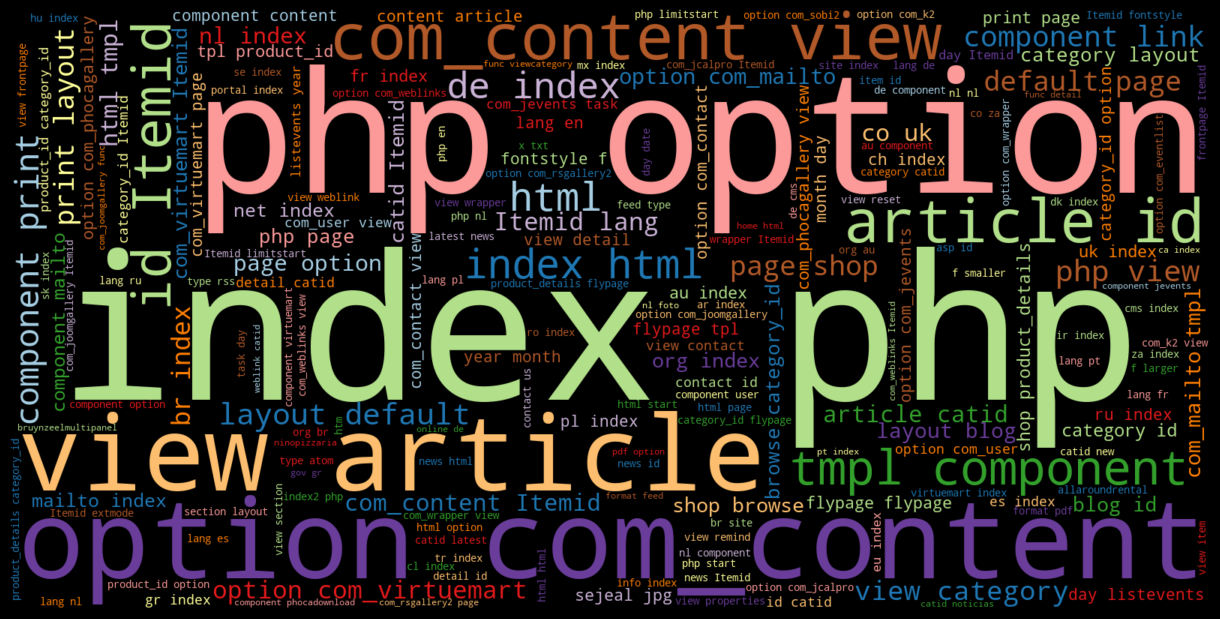

In [14]:
deface_url = " ".join(i for i in df_defacement.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(deface_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

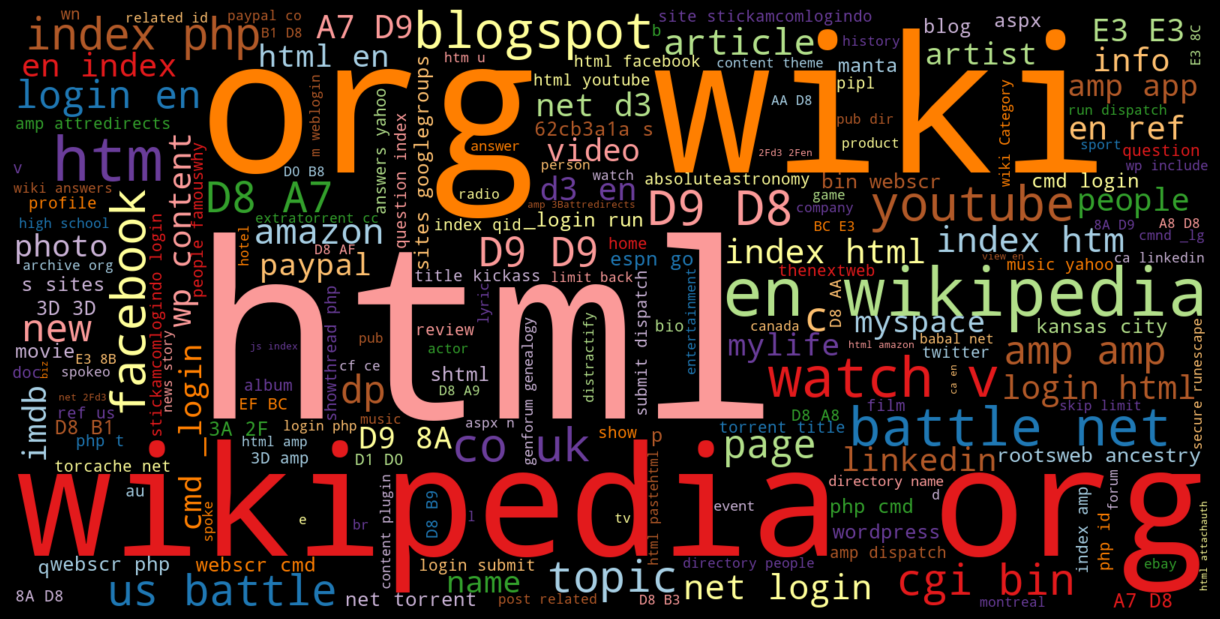

In [15]:
benign_url = " ".join(i for i in df_benign.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(benign_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [16]:
def count_dot(url):
    count_dot=url.count('.')
    return count_dot

In [17]:
df['count_dot']= df['url'].apply(lambda i:count_dot(i))

In [18]:
df['url'].head(15)

0                                      br-icloud.com.br
1                   mp3raid.com/music/krizz_kaliko.html
2                       bopsecrets.org/rexroth/cr/1.htm
3     http://www.garage-pirenne.be/index.php?option=...
4     http://adventure-nicaragua.net/index.php?optio...
5     http://buzzfil.net/m/show-art/ils-etaient-loin...
6         espn.go.com/nba/player/_/id/3457/brandon-rush
7        yourbittorrent.com/?q=anthony-hamilton-soulife
8          http://www.pashminaonline.com/pure-pashminas
9         allmusic.com/album/crazy-from-the-heat-r16990
10    corporationwiki.com/Ohio/Columbus/frank-s-bens...
11    http://www.ikenmijnkunst.nl/index.php/expositi...
12                       myspace.com/video/vid/30602581
13    http://www.lebensmittel-ueberwachung.de/index....
14    http://www.szabadmunkaero.hu/cimoldal.html?sta...
Name: url, dtype: object

In [19]:
df.head(20)

,url,type,count_dot
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,2
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,2
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,2
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,1
8,http://www.pashminaonline.com/pure-pashminas,defacement,2
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,1


In [20]:
mean_dot=df.groupby('type')['count_dot'].mean()

<Axes: xlabel='type'>

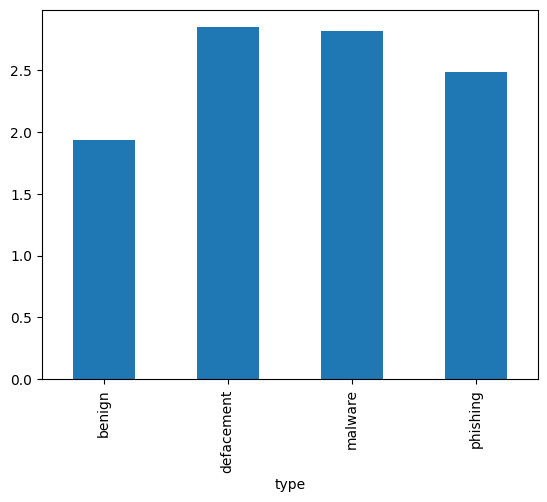

In [21]:
mean_dot.plot(kind='bar')

In [22]:
def count_hyphen(url):
    number_of_hyphen=url.count('-')
    return number_of_hyphen

In [23]:
df['number_of_hyphen']=df['url'].apply(lambda i:count_hyphen(i))

In [24]:
df.head()

,url,type,count_dot,number_of_hyphen
0,br-icloud.com.br,phishing,2,1
1,mp3raid.com/music/krizz_kaliko.html,benign,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,2,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,3,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,2,1


In [25]:
mean_hyphen=df.groupby('type')['number_of_hyphen'].mean()

<Axes: xlabel='type'>

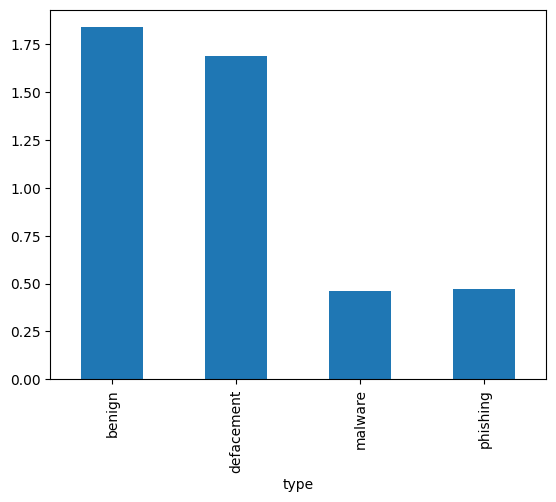

In [26]:
mean_hyphen.plot(kind='bar')

In [27]:
def number_of_qm(url):
    question_marks=url.count('?')
    return question_marks

In [28]:
df['number_of_qm']=df['url'].apply(lambda i:number_of_qm(i))

In [29]:
df.head()

,url,type,count_dot,number_of_hyphen,number_of_qm
0,br-icloud.com.br,phishing,2,1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,2,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,3,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,2,1,1


In [30]:
mean_qm=df.groupby('type')['number_of_qm'].mean()

<Axes: xlabel='type'>

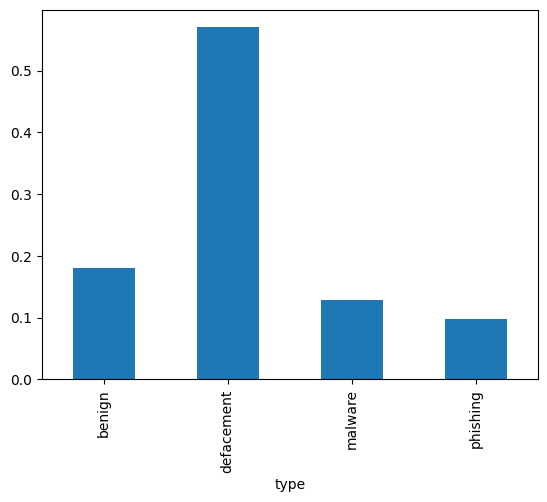

In [31]:
mean_qm.plot(kind='bar')

In [128]:
def number_of_at(url):
    ats=url.count('@')
    return ats

In [130]:
df['number_of_@']= df['url'].apply(lambda i:number_of_at(i))

In [132]:
mean_at=df.groupby('type')['number_of_@'].mean()

<Axes: xlabel='type'>

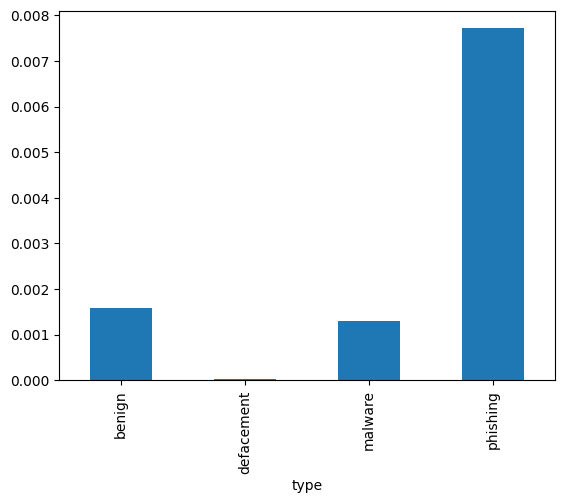

In [133]:
mean_at.plot(kind='bar')

In [134]:
def count_percentage(url):
    number=url.count('%')
    return number 

In [135]:
df['number_of_%']= df['url'].apply(lambda i:count_percentage(i))

In [136]:
def count_equals(url):
    number=url.count('=')
    return number

In [137]:
df['number_of_=']=df['url'].apply(lambda i:count_equals(i))

In [138]:
def count_www(url):
    number=url.count('www')
    return number

In [139]:
df['number_of_www']=df['url'].apply(lambda i:count_www(i))

In [140]:
def count_https(url):
    return url.count('https')

In [141]:
df['number_of_https']=df['url'].apply(lambda i:count_https(i))

In [142]:
def count_http(url):
    return url.count('http')

In [143]:
df['number_of_http']=df['url'].apply(lambda i:count_http(i))

In [147]:
def count_digits(url):
    digits=0
    for i in url:
        if i.isnumeric():
            digits=digits+1
    return digits

In [148]:
df['number_of_digits']=df['url'].apply(lambda i:count_digits(i))

In [150]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [151]:
df['number_of_letters']=df['url'].apply(lambda i:letter_count(i))

In [152]:
def url_length(url):
    return len(str(url))

In [153]:
df['url_length']=df['url'].apply(lambda i:url_length(i))

In [154]:
def hostname_length(url):
    return len(urlparse(url).netloc)

In [155]:
df['hostname_length']=df['url'].apply(lambda i:hostname_length(i))

In [156]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

In [157]:
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [93]:
def contains_ip_address(url):
    # Regex obrazac za IPv4 i IPv6 adrese u URL formatu
    pattern = (
        r'(?:'
        # IPv4
        r'(?:25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.'  # Oktet 1
        r'(?:25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.'  # Oktet 2
        r'(?:25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.'  # Oktet 3
        r'(?:25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)'  # Oktet 4
        r')|'
        # IPv6 unutar uglastih zagrada
        r'\[?'
        r'(?:'
        r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}'  # Pun IPv6 format
        r'|'
        r'(?:[a-fA-F0-9]{1,4}:){1,7}:'  # IPv6 sa skraćenicama
        r'|'
        r'(?:[a-fA-F0-9]{1,4}:){1,6}:[a-fA-F0-9]{1,4}'  # IPv6 sa skraćenicama
        r'|'
        r'(?:[a-fA-F0-9]{1,4}:){1,5}(:[a-fA-F0-9]{1,4}){1,2}'
        r'|'
        r'(?:[a-fA-F0-9]{1,4}:){1,4}(:[a-fA-F0-9]{1,4}){1,3}'
        r'|'
        r'(?:[a-fA-F0-9]{1,4}:){1,3}(:[a-fA-F0-9]{1,4}){1,4}'
        r'|'
        r'(?:[a-fA-F0-9]{1,4}:){1,2}(:[a-fA-F0-9]{1,4}){1,5}'
        r'|'
        r'[a-fA-F0-9]{1,4}(:[a-fA-F0-9]{1,4}){1,6}'
        r'|'
        r':((:[a-fA-F0-9]{1,4}){1,7}|:)'
        r')'
        r'\]?'
    )
    # Koristi re.search za pronalaženje podudaranja
    match = re.search(pattern, url)
    # Vraća 1 ako se pronađe podudaranje, inače vraća 0
    return 1 if match else 0

In [96]:
df['use_of_ip'] = df['url'].apply(lambda i: contains_ip_address(i))

In [97]:
prosekip=df.groupby('type')['use_of_ip'].mean()

<Axes: xlabel='type'>

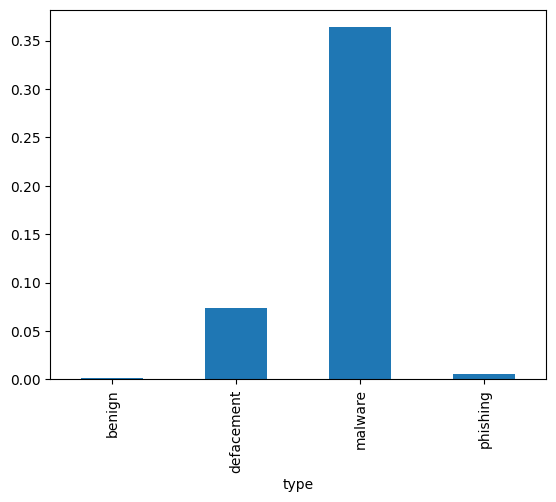

In [98]:
prosekip.plot(kind='bar')

In [99]:
df['use_of_ip'].value_counts()

use_of_ip
0    631124
1     20067
Name: count, dtype: int64

In [101]:
urls = [
    'http://[2001:db8::1]',
    'http://[fe80::1ff:fe23:4567:890a]',
    'http://192.168.1.1',
    'http://example.com',
    'http://[::1]',
    'http://[2001:db8::2:1]',
    'http://[2001:0db8:85a3:0000:0000:8a2e:0370:7334]',
    'http://[::ffff:192.168.1.1]',
    'http://[abcd:ef01:2345:6789:abcd:ef01:2345:6789]',
    'http://[::]/index.html'
]

for url in urls:
    print(f"URL: {url}")
    print(f"Da li sadrzi IP adresu? {contains_ip_address(url)}")
    print()

URL: http://[2001:db8::1]
Da li sadrzi IP adresu? 1

URL: http://[fe80::1ff:fe23:4567:890a]
Da li sadrzi IP adresu? 1

URL: http://192.168.1.1
Da li sadrzi IP adresu? 1

URL: http://example.com
Da li sadrzi IP adresu? 0

URL: http://[::1]
Da li sadrzi IP adresu? 1

URL: http://[2001:db8::2:1]
Da li sadrzi IP adresu? 1

URL: http://[2001:0db8:85a3:0000:0000:8a2e:0370:7334]
Da li sadrzi IP adresu? 1

URL: http://[::ffff:192.168.1.1]
Da li sadrzi IP adresu? 1

URL: http://[abcd:ef01:2345:6789:abcd:ef01:2345:6789]
Da li sadrzi IP adresu? 1

URL: http://[::]/index.html
Da li sadrzi IP adresu? 1



In [124]:
from urllib.parse import urlparse

In [125]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [126]:
df['abnormal_url'].value_counts()

abnormal_url
0    463185
1    188006
Name: count, dtype: int64

In [127]:
df.head()

,url,type,count_dot,number_of_hyphen,number_of_qm,use_of_ip,use_of_ipp,abnormal_url
0,br-icloud.com.br,phishing,2,1,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,2,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,2,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,3,1,1,0,0,1
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,2,1,1,0,0,1


In [158]:
df.info)_

SyntaxError: unmatched ')' (601797245.py, line 1)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   url                651191 non-null  object
 1   type               651191 non-null  object
 2   count_dot          651191 non-null  int64 
 3   number_of_hyphen   651191 non-null  int64 
 4   number_of_qm       651191 non-null  int64 
 5   use_of_ip          651191 non-null  int64 
 6   use_of_ipp         651191 non-null  int64 
 7   abnormal_url       651191 non-null  int64 
 8   number_of_@        651191 non-null  int64 
 9   number_of_%        651191 non-null  int64 
 10  number_of_=        651191 non-null  int64 
 11  number_of_www      651191 non-null  int64 
 12  number_of_https    651191 non-null  int64 
 13  number_of_http     651191 non-null  int64 
 14  number_of_digits   651191 non-null  int64 
 15  number_of_letters  651191 non-null  int64 
 16  url_length         6

In [161]:
from sklearn.preprocessing import LabelEncoder

In [162]:
#0 benign 1 defacement  2 phishing   3 malware
lb_make = LabelEncoder()
df["url_type"] = lb_make.fit_transform(df["type"])
df["url_type"].value_counts()

url_type
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [212]:
X=df[['count_dot','number_of_hyphen','number_of_qm','use_of_ip','abnormal_url','number_of_@','number_of_%','number_of_=','number_of_www',
     'number_of_https','number_of_http','number_of_digits','number_of_letters','url_length','hostname_length','sus_url']]

In [331]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   count_dot          651191 non-null  int64
 1   number_of_hyphen   651191 non-null  int64
 2   number_of_qm       651191 non-null  int64
 3   use_of_ip          651191 non-null  int64
 4   abnormal_url       651191 non-null  int64
 5   number_of_@        651191 non-null  int64
 6   number_of_%        651191 non-null  int64
 7   number_of_=        651191 non-null  int64
 8   number_of_www      651191 non-null  int64
 9   number_of_https    651191 non-null  int64
 10  number_of_http     651191 non-null  int64
 11  number_of_digits   651191 non-null  int64
 12  number_of_letters  651191 non-null  int64
 13  url_length         651191 non-null  int64
 14  hostname_length    651191 non-null  int64
 15  sus_url            651191 non-null  int64
dtypes: int64(16)
memory usage: 79.5 MB


In [332]:
y=df['url_type']

In [333]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,shuffle=True,random_state=5)

In [334]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130239 entries, 120468 to 53044
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   count_dot          130239 non-null  int64
 1   number_of_hyphen   130239 non-null  int64
 2   number_of_qm       130239 non-null  int64
 3   use_of_ip          130239 non-null  int64
 4   abnormal_url       130239 non-null  int64
 5   number_of_@        130239 non-null  int64
 6   number_of_%        130239 non-null  int64
 7   number_of_=        130239 non-null  int64
 8   number_of_www      130239 non-null  int64
 9   number_of_https    130239 non-null  int64
 10  number_of_http     130239 non-null  int64
 11  number_of_digits   130239 non-null  int64
 12  number_of_letters  130239 non-null  int64
 13  url_length         130239 non-null  int64
 14  hostname_length    130239 non-null  int64
 15  sus_url            130239 non-null  int64
dtypes: int64(16)
memory usage: 16.9 MB


In [217]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130239 entries, 120468 to 53044
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   count_dot          130239 non-null  int64
 1   number_of_hyphen   130239 non-null  int64
 2   number_of_qm       130239 non-null  int64
 3   use_of_ip          130239 non-null  int64
 4   abnormal_url       130239 non-null  int64
 5   number_of_@        130239 non-null  int64
 6   number_of_%        130239 non-null  int64
 7   number_of_=        130239 non-null  int64
 8   number_of_www      130239 non-null  int64
 9   number_of_https    130239 non-null  int64
 10  number_of_http     130239 non-null  int64
 11  number_of_digits   130239 non-null  int64
 12  number_of_letters  130239 non-null  int64
 13  url_length         130239 non-null  int64
 14  hostname_length    130239 non-null  int64
 15  sus_url            130239 non-null  int64
dtypes: int64(16)
memory usage: 16.9 MB


<h2>SVM</h2>

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Normalizujte podatke
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kreirajte i obučite SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Napravite predikcije i procenite model
y_pred = svm_model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')


In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))

    

    pred = lgb.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="PHISHING"
        return res
        
    elif int(pred[0]) == 3.0:
        
        res="MALWARE"
        return res

In [ ]:
urls = ['https://web.telegram.org/a/','https://web.telegram.org/a/']
for url in urls:
     print(get_prediction_from_url(url))

<h1> Naivni Bajes</h1>

In [343]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [344]:
model=MultinomialNB()

In [345]:
model.fit(X_train,y_train)

MultinomialNB()

In [346]:
y_predBajes=model.predict(X_test)

In [347]:
print(classification_report(y_test, y_predBajes))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     85621
           1       0.73      0.92      0.82     19292
           2       0.57      0.69      0.62      6504
           3       0.34      0.08      0.13     18822

    accuracy                           0.79    130239
   macro avg       0.62      0.66      0.62    130239
weighted avg       0.75      0.79      0.76    130239



In [348]:
cmbajes=confusion_matrix(y_predBajes,y_test)

In [349]:
acc=accuracy_score(y_test,y_predBajes)
recall=recall_score(y_test,y_predBajes,average='macro')
precision=precision_score(y_test,y_predBajes,average='macro')

In [350]:
print(f'accuracy je {acc} recall je {recall} a precision je {precision}')

accuracy je 0.793878945630725 recall je 0.6552114429265239 a precision je 0.6235305714155759


<h2>Random Forest</h2>

In [237]:
random_forest=RandomForestClassifier(n_estimators=100, random_state=42)

In [238]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [239]:
y_pred = random_forest.predict(X_test)

In [240]:
cm=confusion_matrix(y_pred,y_test)

In [241]:
print('Random Forest confusion matrix',cm)

Random Forest confusion matrix [[84228    59    69  2967]
 [   30 18952   105   591]
 [   19    31  6045    95]
 [ 1344   250   285 15169]]


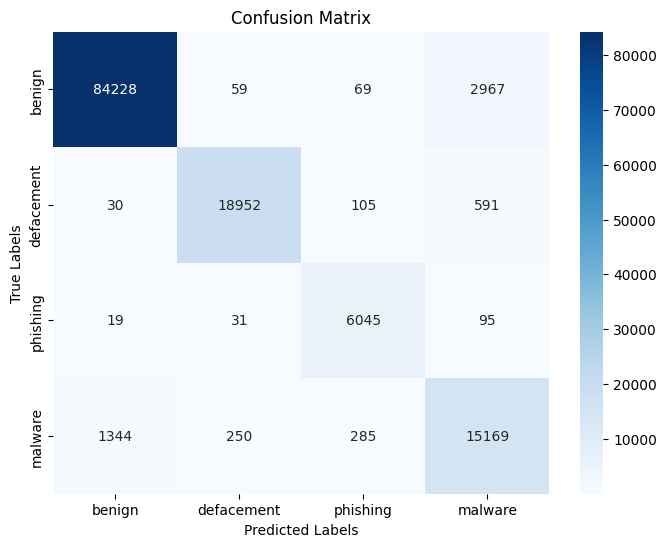

In [242]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'defacement','phishing','malware'], 
            yticklabels=['benign', 'defacement','phishing','malware'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [244]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [245]:
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,average='macro')
precision=precision_score(y_test,y_pred,average='macro')

In [246]:
print(f'accuracy je {acc} recall je {recall} a precision je {precision}')

accuracy je 0.955120969909167 recall je 0.9253633478627399 a precision je 0.9485049488767267


<h2>XG Boost</h2>

In [250]:
import xgboost as xgb

In [251]:
xgb_classifica=xgb.XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=100)

In [252]:
xgb_classifica.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [253]:
xgb_predict=xgb_classifica.predict(X_test)

In [254]:
acc=accuracy_score(y_test,xgb_predict)
recall=recall_score(y_test,xgb_predict,average='macro')
precision=precision_score(y_test,xgb_predict,average='macro')

In [255]:
print(f'accuracy je {accuracy} recall je {recall} a precision je {precision}')

accuracy je 0.955120969909167 recall je 0.7846888290452533 a precision je 0.8771561378821477


In [247]:
#NEUJADNECENE KLASE
total_samples = 428103 + 96457 + 94111 + 32520
percent_benign = (428103 / total_samples) * 100
percent_defacement = (96457 / total_samples) * 100
percent_phishing = (94111 / total_samples) * 100
percent_malware = (32520 / total_samples) * 100

print(f"Benign: {percent_benign:.2f}%")
print(f"Defacement: {percent_defacement:.2f}%")
print(f"Phishing: {percent_phishing:.2f}%")
print(f"Malware: {percent_malware:.2f}%")


Benign: 65.74%
Defacement: 14.81%
Phishing: 14.45%
Malware: 4.99%


In [256]:
total_samples = 428103 + 96457 + 94111 + 32520
weight_benign = total_samples / (4 * 428103)  # Za "benign" klasu
weight_defacement = total_samples / (4 * 96457)  # Za "defacement" klasu
weight_phishing = total_samples / (4 * 94111)  # Za "phishing" klasu
weight_malware = total_samples / (4 * 32520)  # Za "malware" klasu

weights = {
    'benign': weight_benign,
    'defacement': weight_defacement,
    'phishing': weight_phishing,
    'malware': weight_malware
}

# Konfiguriši model sa težinama klasa
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=100,scale_pos_weight=weights)

xgb_classifier.fit(X_train, y_train)

C:\Users\Andjela\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:42:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [257]:
xgb_predict2=xgb_classifier.predict(X_test)

In [260]:
acc=accuracy_score(y_test,xgb_predict2)
recall=recall_score(y_test,xgb_predict2,average='macro')
precision=precision_score(y_test,xgb_predict2,average='macro')

In [261]:
print(f'accuracy je {acc} recall je {recall} a precision je {precision}')

accuracy je 0.890393814448821 recall je 0.7846888290452533 a precision je 0.8771561378821477


In [266]:
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline

In [298]:
from imblearn.under_sampling import RandomUnderSampler

# Definiši RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

model=RandomForestClassifier(n_estimators=100, random_state=42)

# Kreiraj pipeline
pipeline = Pipeline([('undersample', undersample), ('model', model)])

# Treniraj model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('undersample', RandomUnderSampler(random_state=42)),
                ('model', RandomForestClassifier(random_state=42))])

In [299]:
y_pred2 = pipeline.predict(X_test)

In [300]:
cm=confusion_matrix(y_pred2,y_test)

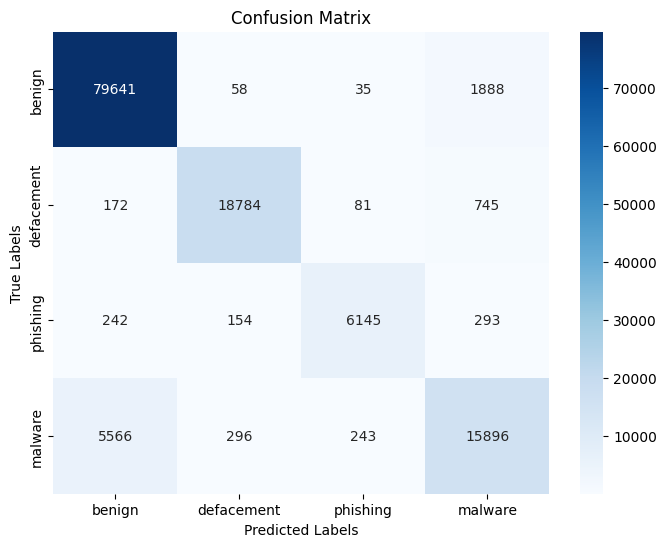

In [301]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'defacement','phishing','malware'], 
            yticklabels=['benign', 'defacement','phishing','malware'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [285]:
acc=accuracy_score(y_test,y_pred2)
recall=recall_score(y_test,y_pred2,average='macro')
precision=precision_score(y_test,y_pred2,average='macro')

In [286]:
print(f'accuracy je {acc} recall je {recall} a precision je {precision}')

accuracy je 0.924961033177466 recall je 0.9232929950028333 a precision je 0.8867432148924964


In [293]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     85621
           1       0.95      0.97      0.96     19292
           2       0.90      0.94      0.92      6504
           3       0.72      0.84      0.78     18822

    accuracy                           0.92    130239
   macro avg       0.89      0.92      0.90    130239
weighted avg       0.93      0.92      0.93    130239



In [307]:

# Pretpostavljamo da su X i y već definisani
# X, y = ...

# Deljenje podataka na obučne i testne skupove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiši RandomUnderSampler
undersample = RandomUnderSampler(random_state=42,sampling_strategy='auto')

# Definiši RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Kreiraj pipeline sa undersampling i modelom
pipeline = Pipeline([
    ('undersample', undersample),  # Primeni random undersampling
    ('model', model)               # Treniraj model
])

# Treniraj model
pipeline.fit(X_train, y_train)

# Predikcija i evaluacija
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.93      0.95     85778
           1       0.94      0.97      0.96     19104
           2       0.90      0.94      0.92      6521
           3       0.72      0.84      0.78     18836

    accuracy                           0.92    130239
   macro avg       0.89      0.92      0.90    130239
weighted avg       0.93      0.92      0.93    130239



In [308]:
cm=confusion_matrix(y_pred,y_test)

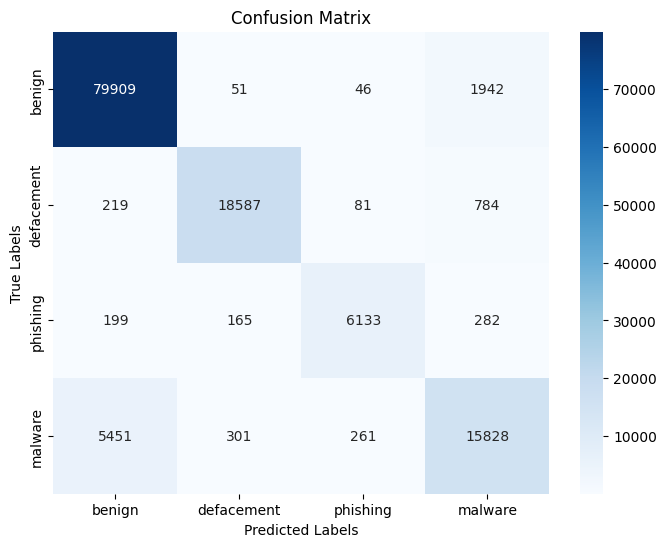

In [309]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'defacement','phishing','malware'], 
            yticklabels=['benign', 'defacement','phishing','malware'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [306]:
original_class_distribution = y.value_counts(normalize=True)

# Izračunaj raspodelu klasa u obučnom skupu
train_class_distribution = y_train.value_counts(normalize=True)

# Izračunaj raspodelu klasa u testnom skupu
test_class_distribution = y_test.value_counts(normalize=True)

# Ispiši raspodelu klasa
print("Original Class Distribution:")
print(original_class_distribution)

print("\nTraining Set Class Distribution:")
print(train_class_distribution)

print("\nTest Set Class Distribution:")
print(test_class_distribution)

Original Class Distribution:
url_type
0    0.657415
1    0.148124
3    0.144521
2    0.049939
Name: proportion, dtype: float64

Training Set Class Distribution:
url_type
0    0.657114
1    0.148484
3    0.144495
2    0.049907
Name: proportion, dtype: float64

Test Set Class Distribution:
url_type
0    0.658620
1    0.146684
3    0.144626
2    0.050069
Name: proportion, dtype: float64


In [311]:
# Ako je y_train pandas Series
unique_classes = y_train.unique()
print("Unique classes in y_train:", unique_classes)


Unique classes in y_train: [0 3 2 1]


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   url                651191 non-null  object
 1   type               651191 non-null  object
 2   count_dot          651191 non-null  int64 
 3   number_of_hyphen   651191 non-null  int64 
 4   number_of_qm       651191 non-null  int64 
 5   use_of_ip          651191 non-null  int64 
 6   use_of_ipp         651191 non-null  int64 
 7   abnormal_url       651191 non-null  int64 
 8   number_of_@        651191 non-null  int64 
 9   number_of_%        651191 non-null  int64 
 10  number_of_=        651191 non-null  int64 
 11  number_of_www      651191 non-null  int64 
 12  number_of_https    651191 non-null  int64 
 13  number_of_http     651191 non-null  int64 
 14  number_of_digits   651191 non-null  int64 
 15  number_of_letters  651191 non-null  int64 
 16  url_length         6

<h1>Balansiranje podataka</h1>

In [316]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [329]:
X.head()

,count_dot,number_of_hyphen,number_of_qm,use_of_ip,abnormal_url,number_of_@,number_of_%,number_of_=,number_of_www,number_of_https,number_of_http,number_of_digits,number_of_letters,url_length,hostname_length,sus_url
0,2,1,0,0,0,0,0,0,0,0,0,0,13,16,0,0
1,2,0,0,0,0,0,0,0,0,0,0,1,29,35,0,0
2,2,0,0,0,0,0,0,0,0,0,0,1,25,31,0,0
3,3,1,1,0,1,0,0,4,1,0,1,7,63,88,21,0
4,2,1,1,0,1,0,0,3,0,0,1,22,199,235,23,0


In [325]:
#NEURAVNOTEZEN SKUP PODATAKA
#DISBALANS POZITIVNE I NEGATIVNE KLASE
value_counts=y_train['url_type'].value_counts(normalize = True)

KeyError: 'url_type'

In [321]:
print(value_counts)

type
benign        0.657415
defacement    0.148124
phishing      0.144521
malware       0.049939
Name: proportion, dtype: float64


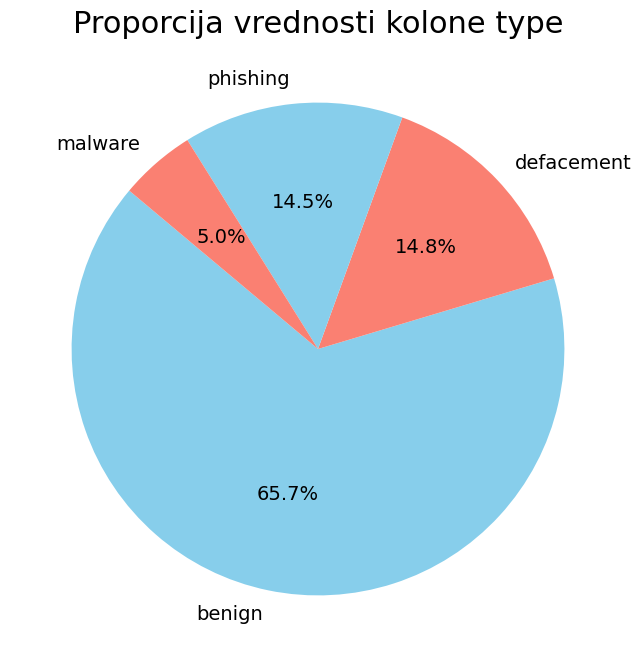

In [320]:
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140, textprops={'fontsize': 14})
plt.title('Proporcija vrednosti kolone type', fontsize=22)
plt.show()

In [ ]:
X

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Definiši RandomUnderSampler sa specifičnim brojem instanci za svaku klasu
undersample = RandomUnderSampler(sampling_strategy={
    0: 30000,
    1: 30000,
    2: 30000,
    3: 30000
}, random_state=42)

# Primeni undersampling
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)